# Costa Rican Household Poverty Level Prediction
*From Kaggle ([competition link](https://www.kaggle.com/c/costa-rican-household-poverty-prediction))*
  
**By Nema Sobhani & David LaCharite**

## Summary

Income qualification for poor families in Costa Rica to determing need for aid. Data gathered from the *Inter-American Development Bank.*

## Imports

In [55]:
# General tools
import pandas as pd
import numpy as np

# Functions
from functions import *

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

# Classification
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# Classification (Initial)

In [56]:
# Load dataframe 
df = pd.read_pickle('df.pkl')

# Partition explanatory and response variables
X = df.drop(columns='Target')
print(X.shape)

y = df['Target']
print(y.shape)

(9557, 135)
(9557,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [58]:
clf_linear = LinearRegression()

In [59]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.49476987447698745

In [61]:
f1_linear = f1_score(y_test, y_pred, average='macro')
f1_linear

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28386560965239604

## Multiclass Logistic

In [62]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [63]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: C

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [64]:
clf_multiclass_logistic.score(X_test, y_test)

0.5230125523012552

In [65]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic

0.3871799012694391

## SVM

In [66]:
clf_SVM = SVC()

In [67]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
clf_SVM.score(X_test, y_test)

0.6260460251046025

In [69]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM

0.22173155053186192

## Random Forests

In [70]:
clf_RF = RandomForestClassifier()

In [71]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
clf_RF.score(X_test, y_test)

0.891213389121339

In [73]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF = f1_score(y_test, y_pred_RF, average='macro')
f1_RF

0.8322908158024427

In [74]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
SQBmeaned,0.048386
meaneduc,0.047560
SQBdependency,0.037160
SQBhogar_nin,0.033237
SQBedjefe,0.029455
qmobilephone,0.025193
rooms,0.023751
age,0.022135
SQBovercrowding,0.021225
agesq,0.021054


## XGB Classifier

In [75]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [76]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.251929	validation_1-merror:0.268828
[1]	validation_0-merror:0.238195	validation_1-merror:0.258891
[2]	validation_0-merror:0.233224	validation_1-merror:0.256276
[3]	validation_0-merror:0.228515	validation_1-merror:0.245816
[4]	validation_0-merror:0.228646	validation_1-merror:0.251046
[5]	validation_0-merror:0.223283	validation_1-merror:0.250523
[6]	validation_0-merror:0.218967	validation_1-merror:0.250523
[7]	validation_0-merror:0.219097	validation_1-merror:0.246862
[8]	validation_0-merror:0.213996	validation_1-merror:0.243724
[9]	validation_0-merror:0.212819	validation_1-merror:0.239017
[10]	validation_0-merror:0.212034	validation_1-merror:0.241632
[11]	validation_0-merror:0.210464	validation_1-merror:0.238494
[12]	validation_0-merror:0.206148	validation_1-merror:0.232741
[13]	validation_0-merror:0.205363	validation_1-merror:0.230649
[14]	validation_0-merror:0.203401	validation_1-merror:0.228033
[15]	validation_0-merror:0.201177	validation_1-merror:0.224372
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [77]:
clf_xgb.score(X_test, y_test)

0.8603556485355649

In [78]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb

0.7887912428409045

### Feature Importance (XGBoost)

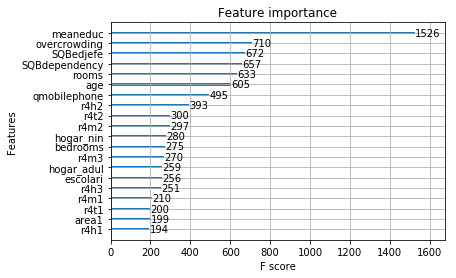

In [79]:
xgb.plot_importance(clf_xgb, max_num_features=20)

# Classification with Predicted Rent Values

In [80]:
# Load dataframe 
df_rent = pd.read_pickle('df_rent.pkl')

# Partition explanatory and response variables
X = df_rent.drop(columns='Target')
print(X.shape)

y = df_rent['Target']
print(y.shape)

(9557, 136)
(9557,)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [82]:
clf_linear = LinearRegression()

In [83]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.4952928870292887

In [85]:
f1_linear_rent = f1_score(y_test, y_pred, average='macro')
f1_linear_rent

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28552747900196884

## Multiclass Logistic

In [86]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [87]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: C

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [88]:
clf_multiclass_logistic.score(X_test, y_test)

0.5057531380753139

In [89]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic_rent = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic_rent

0.3354626622214823

## SVM

In [90]:
clf_SVM = SVC()

In [91]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [92]:
clf_SVM.score(X_test, y_test)

0.6302301255230126

In [93]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM_rent = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM_rent

0.2066695713089907

## Random Forests

In [94]:
clf_RF = RandomForestClassifier()

In [95]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
clf_RF.score(X_test, y_test)

0.9021966527196653

In [97]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF_rent = f1_score(y_test, y_pred_RF, average='macro')
f1_RF_rent

0.85445860885776

In [98]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
meaneduc,0.050595
SQBmeaned,0.049719
SQBdependency,0.040929
v2a1,0.040395
overcrowding,0.029288
SQBedjefe,0.029024
qmobilephone,0.023197
hogar_nin,0.022029
SQBovercrowding,0.021949
SQBhogar_nin,0.021004


## XGB Classifier

In [99]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [100]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.254284	validation_1-merror:0.27772
[1]	validation_0-merror:0.241857	validation_1-merror:0.265167
[2]	validation_0-merror:0.235971	validation_1-merror:0.257845
[3]	validation_0-merror:0.228385	validation_1-merror:0.251046
[4]	validation_0-merror:0.225899	validation_1-merror:0.247385
[5]	validation_0-merror:0.221975	validation_1-merror:0.245293
[6]	validation_0-merror:0.220798	validation_1-merror:0.243724
[7]	validation_0-merror:0.215566	validation_1-merror:0.239017
[8]	validation_0-merror:0.214258	validation_1-merror:0.23954
[9]	validation_0-merror:0.212165	validation_1-merror:0.239017
[10]	validation_0-merror:0.210595	validation_1-merror:0.237971
[11]	validation_0-merror:0.209156	validation_1-merror:0.233264
[12]	validation_0-merror:0.20811	validation_1-merror:0.235356
[13]	validation_0-merror:0.203401	validation_1-merror:0.231695
[14]	validation_0-merror:0.202878	validation_1-merror:0.232218
[15]	validation_0-merror:0.199608	validation_1-merror:0.226987
[16]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [101]:
clf_xgb.score(X_test, y_test)

0.8561715481171548

In [102]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb_rent = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb_rent

0.7752747119102226

### Feature Importance (XGBoost)

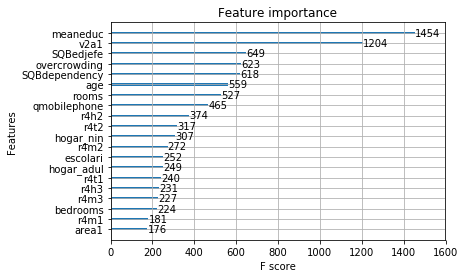

In [103]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Comparison of Models

In [104]:
print("Change in f1 with predicted rent values:\n")

# Linear Regression
print("Linear Regression:\t ", round(f1_linear_rent - f1_linear, 5))

# Multiple Logistic Regression
print("Logistic Regression:\t", round(f1_logistic_rent - f1_logistic, 5))

# SVM
print("Support Vector Machines:", round(f1_SVM_rent - f1_SVM, 5))

# Random Forrest
print("Random Forrest:\t\t ", round(f1_RF_rent - f1_RF, 5))

# XGB
print("XGBoost:\t\t", round(f1_xgb_rent - f1_xgb, 5))

Change in f1 with predicted rent values:

Linear Regression:	  0.00166
Logistic Regression:	 -0.05172
Support Vector Machines: -0.01506
Random Forrest:		  0.02217
XGBoost:		 -0.01352


In [106]:
print("NO RENT (RF)", f1_RF)
print("W/ RENT (RF)", f1_RF_rent)
print("NO RENT (XGB)", f1_xgb)
print("W/ RENT (XGB)", f1_xgb_rent)

NO RENT (RF) 0.8322908158024427
W/ RENT (RF) 0.85445860885776
NO RENT (XGB) 0.7887912428409045
W/ RENT (XGB) 0.7752747119102226
